# 数学的基礎から学ぶ Deep Learning (with Python) Vol. 13【MPS 横浜 第13回】

Q1. (+1, -1)をEchoするNNを作ってどんなネットワークができるか見てみよう

をやってみた。

In [1]:
%matplotlib inline
import sys
sys.path.append('..')
from nn.networks import Classifier
import helpers
from tqdm import tqdm
import numpy as np

LEARNING_RATE = 0.15

# 入力と教師データ
data = [( [ np.array([[-1,]]), np.array([[-1,]]) ] ),    # -1 -> -1
        ( [ np.array([[ 1,]]), np.array([[ 1,]]) ] ) ]   #  1 ->  1

# 学習結果を返す関数
def create_classfier(dt, st):
    classfier = Classifier('tanh', 1, 'se', LEARNING_RATE)
    classfier.add_layer('tanh', 1, alpha=1.0, beta=1.0)
    helpers.training(classfier, dt, st)
    return classfier

In [2]:
# 100回学習
st1 = 100
cf1 = create_classfier(data, st1)
# 1000回学習
st2 = 1000
cf2 = create_classfier(data, st2)
# 100000回学習
st3 = 100000
cf3 = create_classfier(data, st3)

100%|██████████| 100000/100000 [00:12<00:00, 7776.90it/s]


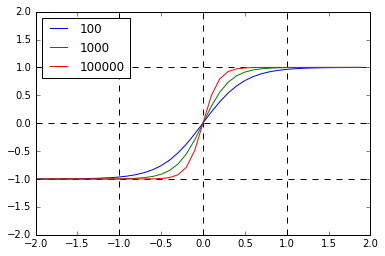

In [3]:
# 学習データの成果を描画
import matplotlib.pyplot as plt
x = np.array([np.arange(-2.0, 2.0, 0.1)])
y1 = cf1.propagate_forward(x)
y2 = cf2.propagate_forward(x)
y3 = cf3.propagate_forward(x)

plt.hlines(   0, -2.0, 2.0, linestyles="dashed")
plt.hlines( 1.0, -2.0, 2.0, linestyles="dashed")
plt.hlines(-1.0, -2.0, 2.0, linestyles="dashed")

plt.vlines(   0, -2.0, 2.0, linestyles="dashed")
plt.vlines( 1.0, -2.0, 2.0, linestyles="dashed")
plt.vlines(-1.0, -2.0, 2.0, linestyles="dashed")

plt.plot(x[0], y1[0], label=st1)
plt.plot(x[0], y2[0], label=st2)
plt.plot(x[0], y3[0], label=st3)
plt.legend(loc='upper left')
plt.show()

学習の回数が増えるほど、グラフは急峻になる。

100回学習のグラフが原点を通っていないのは、まだbの値が十分に減っていないから。

では、Wとbの値はどれくらいか。

In [4]:
print('cf1(   100) (W, b) =', cf1._layers[0]._W, cf1._layers[0]._b)
print('cf2(  1000) (W, b) =', cf2._layers[0]._W, cf2._layers[0]._b)
print('cf3(100000) (W, b) =', cf3._layers[0]._W, cf3._layers[0]._b)

cf1(   100) (W, b) = [[ 2.00328454]] [[ 0.0033138]]
cf2(  1000) (W, b) = [[ 3.12278415]] [[ -1.00529027e-05]]
cf3(100000) (W, b) = [[ 5.41405425]] [[  1.65699573e-05]]


Wをもっと大きな数値にしてb=0にするとどうなるか？

cf4を作って比較してみる

In [5]:
cf4 = create_classfier(data, 0)
cf4._layers[0]._W = np.array([[1000000000000,]])
cf4._layers[0]._b = np.array([[0,]])

0it [00:00, ?it/s]


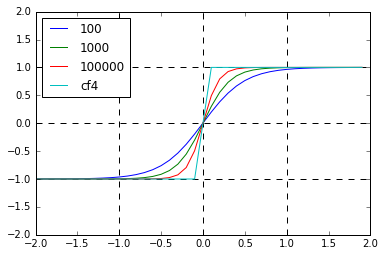

In [6]:
y4 = cf4.propagate_forward(x)

plt.hlines(   0, -2.0, 2.0, linestyles="dashed")
plt.hlines( 1.0, -2.0, 2.0, linestyles="dashed")
plt.hlines(-1.0, -2.0, 2.0, linestyles="dashed")

plt.vlines(   0, -2.0, 2.0, linestyles="dashed")
plt.vlines( 1.0, -2.0, 2.0, linestyles="dashed")
plt.vlines(-1.0, -2.0, 2.0, linestyles="dashed")

plt.plot(x[0], y1[0], label=st1)
plt.plot(x[0], y2[0], label=st2)
plt.plot(x[0], y3[0], label=st3)
plt.plot(x[0], y4[0], label="cf4")
plt.legend(loc='upper left')

plt.show()